# Árboles de Decisión
### Dataset PayTenis
https://github.com/luelhagos/Play-Tennis-Implementation-Using-Sklearn-Decision-Tree-Algorithm/blob/master/Play%20Tennis%20%20Implementation%20Using%20Sklearn%20Decision%20Tree%20Algorithm.ipynb

In [8]:
# Importamos las librerías necesarias.
import pandas as pd     # Para el manejo de datos
import numpy as np
      
import matplotlib.pyplot as plt

from scipy.stats import entropy
from math import log

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Importing the Dataset

In [9]:
df_tenis = pd.read_csv("H:\FIUBA 2013\ORGANICION DE DATOS\Machine Learning - Organizacion de datos\Datasets\PlayTennis.csv")
df_tenis


,Outlook,Temprature,Humidity,Wind,Play_Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


# Creamos una funcion las metrica Entropía.

In [10]:
def entropia(data):
    prob = pd.value_counts(data) / len(data)
    return sum(np.log2(prob) * prob * (-1)) 

entropia(df_tenis.Outlook)

1.5774062828523454

In [11]:
def gain(data, str1, str2):
    e1 = data.groupby(str1).apply(lambda x: entropia(x[str2]))
    p1 = pd.value_counts(data[str1]) / len(data[str1])
    e2 = sum(e1 * p1)
    return entropia(data[str2]) - e2

In [12]:
def gain_information(data, str):
    entropia_data()
    

In [ ]:
# Funcion para calcular la entropia de un atributo
def entropia(atributo):
    return entropy(atributo.value_counts() / len(atributo), base=2)

In [16]:
for col in df_tenis.columns[:-1]:
    print(col, entropia(df_tenis[col]))

Outlook 1.5774062828523454
Temprature 1.5566567074628228
Humidity 1.0
Wind 0.9852281360342515


In [17]:
# Funcion para calcular la ganancia de informacion
def ganancia_informacion(df, atributo, target):
    entropia_target = entropia(df[target])
    valores_atributo = df[atributo].unique()
    entropia_atributo = 0
    for valor in valores_atributo:
        entropia_atributo += entropia(df[df[atributo] == valor][target])
    return entropia_target - entropia_atributo

for col in df_tenis.columns[:-1]:
    print(col, ganancia_informacion(df_tenis, col, 'Play_Tennis'))


Outlook -1.001615230238706
Temprature -1.7892879998429914
Humidity -0.636614955945948
Wind -0.8709921657885018


# Data Analysis

In [18]:
df_tenis.describe()   

,Outlook,Temprature,Humidity,Wind,Play_Tennis
count,14,14,14,14,14
unique,3,3,2,2,2
top,Sunny,Mild,High,Weak,Yes
freq,5,6,7,8,9


# Preparing the Data (Data Slicing)

In [19]:
# Los algoritmos de aprendizaje automático solo pueden aprender de números (int, float, doubles ..)
# así que codifiquémoslo a int
from sklearn import preprocessing

string_to_int = preprocessing.LabelEncoder()    # encode your data
df = df_tenis.apply(string_to_int.fit_transform)    # fit and transform it
df

,Outlook,Temprature,Humidity,Wind,Play_Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [20]:
# Dividir nuestros datos en conjuntos de entrenamiento y prueba:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.loc[:, 'Outlook':'Wind'], df.Play_Tennis, test_size=0.30) 

# Training and Making Predictions

In [21]:
from sklearn.tree import DecisionTreeClassifier                             # import the classifier

classifier = DecisionTreeClassifier(criterion="entropy", random_state=100)     # create a classifier object
classifier.fit(X_train, y_train)                                              # fit the classifier with X and Y data or 

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [22]:
#Predict the response for test dataset
y_pred = classifier.predict(X_test)  

In [23]:
# Precisión del modelo, ¿con qué frecuencia es correcto el clasificador?
from sklearn.metrics import accuracy_score

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8


In [24]:
# Mostramos los resultados.
pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

,Actual,Predicted
8,1,1
12,1,1
2,1,1
7,0,0
3,1,0


# Evaluating the Algorithm

In [25]:
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred)) 

[[1 0]
 [1 3]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.75      0.86         4

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5



# Visualizing Decision Trees

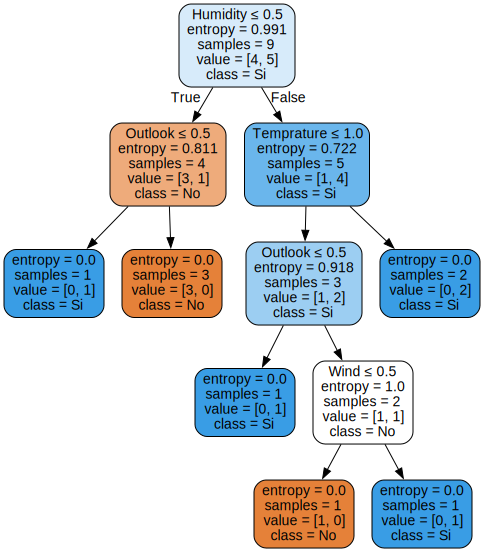

In [28]:
# Graficamos el árbol de decisión
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names=X_train.columns, 
                                class_names=['No', 'Si'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph


<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>